## 1) Gerar Historico GIT - CLI no Documentos/Github

In [1]:
import os
import subprocess
import csv
from datetime import datetime

# Configuração - Aponta para a raiz dos projetos GitHub
root_dir = "/home/pedrov12/Documentos/GitHub/"
output_file = "/home/pedrov12/Documentos/GitHub/Pikachu-Flask-Server/batcaverna/batcaverna-project/scripts/historico-projetos.csv"


def get_git_log(repo_path):
    try:
        # Pega os ultimos 10 commits: Hash Abreviado | Data | Autor | Mensagem
        cmd = [
            "git",
            "-C",
            repo_path,
            "log",
            "-n",
            "10",
            "--pretty=format:%h|%ad|%an|%s",
            "--date=short",
        ]
        result = (
            subprocess.check_output(cmd, stderr=subprocess.STDOUT)
            .decode("utf-8")
            .strip()
        )
        if not result:
            return []
        return result.split("\n")
    except subprocess.CalledProcessError:
        return []
    except Exception as e:
        return [f"Erro|{str(e)}||"]


def main():
    print(f"Iniciando varredura em: {os.path.abspath(root_dir)}")

    with open(output_file, "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        # Cabeçalho do CSV
        writer.writerow(["Projeto", "Hash", "Data", "Autor", "Mensagem"])

        # Listar diretórios
        items = os.listdir(root_dir)
        items.sort()

        projects_found = 0

        for item in items:
            item_path = os.path.join(root_dir, item)

            # Verifica se é diretório e se tem .git
            if os.path.isdir(item_path) and os.path.exists(
                os.path.join(item_path, ".git")
            ):
                projects_found += 1
                commits = get_git_log(item_path)

                if commits:
                    for commit in commits:
                        parts = commit.split("|")
                        if len(parts) >= 4:
                            # Reconstrói a mensagem se ela continha pipes
                            msg = "|".join(parts[3:])
                            writer.writerow([item, parts[0], parts[1], parts[2], msg])
                        else:
                            writer.writerow([item, "Formato Inválido", "", "", commit])
                else:
                    writer.writerow([item, "Sem commits", "", "", ""])

    print(
        f"Concluido. {projects_found} projetos git analisados. Arquivo salvo em {output_file}"
    )


if __name__ == "__main__":
    main()

Iniciando varredura em: /home/pedrov12/Documentos/GitHub
Concluido. 9 projetos git analisados. Arquivo salvo em /home/pedrov12/Documentos/GitHub/Pikachu-Flask-Server/batcaverna/batcaverna-project/scripts/historico-projetos.csv


## 2) Varredura de historico de projetos

In [2]:
import os
import subprocess
import csv
from datetime import datetime

# Configuração - Aponta para a raiz dos projetos GitHub
root_dir = "/home/pedrov12/Documentos/GitHub/"
output_file = "/home/pedrov12/Documentos/GitHub/Pikachu-Flask-Server/batcaverna/batcaverna-project/scripts/historico-projetos.csv"


def get_git_log(repo_path):
    try:
        # Pega os ultimos 10 commits: Hash Abreviado | Data | Autor | Mensagem
        cmd = [
            "git",
            "-C",
            repo_path,
            "log",
            "-n",
            "10",
            "--pretty=format:%h|%ad|%an|%s",
            "--date=short",
        ]
        result = (
            subprocess.check_output(cmd, stderr=subprocess.STDOUT)
            .decode("utf-8")
            .strip()
        )
        if not result:
            return []
        return result.split("\n")
    except subprocess.CalledProcessError:
        return []
    except Exception as e:
        return [f"Erro|{str(e)}||"]


def main():
    print(f"Iniciando varredura em: {os.path.abspath(root_dir)}")

    with open(output_file, "w", newline="", encoding="utf-8") as csvfile:
        writer = csv.writer(csvfile)
        # Cabeçalho do CSV
        writer.writerow(["Projeto", "Hash", "Data", "Autor", "Mensagem"])

        # Listar diretórios
        items = os.listdir(root_dir)
        items.sort()

        projects_found = 0

        for item in items:
            item_path = os.path.join(root_dir, item)

            # Verifica se é diretório e se tem .git
            if os.path.isdir(item_path) and os.path.exists(
                os.path.join(item_path, ".git")
            ):
                projects_found += 1
                commits = get_git_log(item_path)

                if commits:
                    for commit in commits:
                        parts = commit.split("|")
                        if len(parts) >= 4:
                            # Reconstrói a mensagem se ela continha pipes
                            msg = "|".join(parts[3:])
                            writer.writerow([item, parts[0], parts[1], parts[2], msg])
                        else:
                            writer.writerow([item, "Formato Inválido", "", "", commit])
                else:
                    writer.writerow([item, "Sem commits", "", "", ""])

    print(
        f"Concluido. {projects_found} projetos git analisados. Arquivo salvo em {output_file}"
    )


if __name__ == "__main__":
    main()

Iniciando varredura em: /home/pedrov12/Documentos/GitHub
Concluido. 9 projetos git analisados. Arquivo salvo em /home/pedrov12/Documentos/GitHub/Pikachu-Flask-Server/batcaverna/batcaverna-project/scripts/historico-projetos.csv


## 3) Análise de projetos GitHub

ANÁLISE DE HISTÓRICO DE PROJETOS GIT
------------------------------------------------------------
🔍 1. AMOSTRA DOS DADOS (ORDENADOS POR DATA)
------------------------------------------------------------


,Data,Projeto,Mensagem
35,2026-02-14,Pikachu-Flask-Server,Create show_do_milhao_AI.html
24,2026-02-14,Palkia-PDF-extractor,up
34,2026-02-14,Pikachu-Flask-Server,update
45,2026-02-13,Repopulation-With-Elite-Set,up
36,2026-02-13,Pikachu-Flask-Server,up
48,2026-02-13,Repopulation-With-Elite-Set,up
49,2026-02-13,Repopulation-With-Elite-Set,up
50,2026-02-13,Repopulation-With-Elite-Set,Update CheckListFinalRCE2025.md
51,2026-02-13,Repopulation-With-Elite-Set,novo run
53,2026-02-13,Repopulation-With-Elite-Set,Update CheckListFinalRCE2025.md



------------------------------------------------------------
📅 2. HISTÓRICO DE ATIVIDADE MENSAL (QTD COMMITS)
------------------------------------------------------------


Projeto,Gohan-treinamentos-web-app,Jedi-CyberPunk,Network-Tunnel-Go-VM,Palkia-PDF-extractor,Pikachu-Flask-Server,Repopulation-With-Elite-Set,astro-blog-pedrov12,dashboard-website-template,my-flutter-getx-template-app
Periodo,,,,,,,,,
2025-06,4,0,0,0,0,0,0,0,0
2025-07,1,0,0,0,0,0,0,0,5
2025-08,2,0,0,0,0,0,0,0,4
2025-09,0,0,0,0,0,0,6,0,1
2025-12,0,0,0,0,0,0,1,0,0
2026-01,2,3,4,0,0,0,3,2,0
2026-02,1,7,0,10,10,10,0,8,0



------------------------------------------------------------
📈 3. EVOLUÇÃO TOTAL (SOMA DE TODOS OS PROJETOS)
------------------------------------------------------------


Periodo
2025-06     4
2025-07     6
2025-08     6
2025-09     7
2025-12     1
2026-01    14
2026-02    46
Freq: M, dtype: int64


GERANDO GRÁFICO DE SÉRIE TEMPORAL

✅ Gráfico de série temporal salvo em: /home/pedrov12/Documentos/GitHub/serie_temporal_commits.png


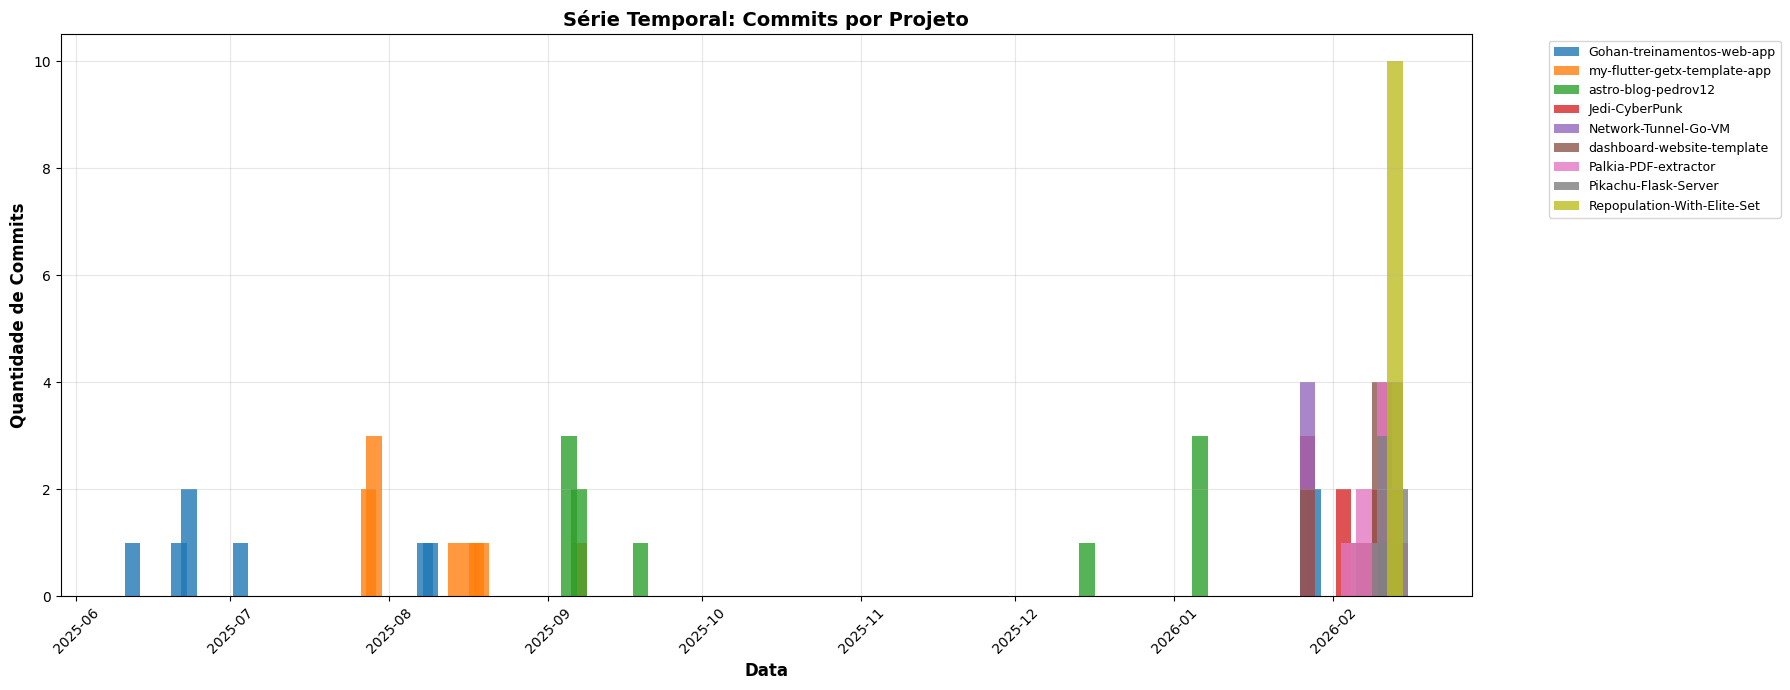

In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from IPython.display import display


file_path ="/home/pedrov12/Documentos/GitHub/Pikachu-Flask-Server/batcaverna/batcaverna-project/scripts/historico-projetos.csv"


def analisar():
    if not os.path.exists(file_path):
        print(f"Erro: O arquivo {file_path} não foi encontrado.")
        return

    try:
        # 1. Carregar Dados
        df = pd.read_csv(file_path)

        # 2. Converter Data e Ordenar
        df["Data"] = pd.to_datetime(df["Data"], errors="coerce")
        df = df.dropna(subset=["Data"])  # Remove datas inválidas
        df = df.sort_values(by="Data", ascending=True)  # Mais antigo para o mais novo

        print("-" * 60)
        print("🔍 1. AMOSTRA DOS DADOS (ORDENADOS POR DATA)")
        print("-" * 60)
        # Mostra as colunas principais das últimas 10 linhas (mais recentes)
        display(df[["Data", "Projeto", "Mensagem"]].sort_values(by="Data", ascending=False).head(20))

        # 3. Análise Mensal (Agrupamento)
        df["Periodo"] = df["Data"].dt.to_period(
            "M"
        )  # Cria coluna Jan-2025, Fev-2025...

        # Tabela Cruzada: Linhas = Mês, Colunas = Projeto, Valores = Contagem de Commits
        pivot_mensal = pd.crosstab(df["Periodo"], df["Projeto"])

        print("\n" + "-" * 60)
        print("📅 2. HISTÓRICO DE ATIVIDADE MENSAL (QTD COMMITS)")
        print("-" * 60)
        display(pivot_mensal)

        # 4. Total Geral por Mês (Acumulado do mês)
        total_por_mes = df.groupby("Periodo").size()

        print("\n" + "-" * 60)
        print("📈 3. EVOLUÇÃO TOTAL (SOMA DE TODOS OS PROJETOS)")
        print("-" * 60)
        display(total_por_mes)

        return df

    except Exception as e:
        print(f"Ocorreu um erro na análise: {e}")
        return None


def plotar_serie_temporal(df, type="lines"):
    """Plota série temporal com commits por projeto.

    Parâmetros:
        df: DataFrame com colunas ["Data", "Projeto"] (e opcionalmente outras).
        type: "lines" (padrão) ou "bar".
    """
    if df is None or df.empty:
        print("Erro: DataFrame vazio ou inválido.")
        return

    if type not in {"lines", "bar"}:
        raise ValueError('Parâmetro "type" deve ser "lines" ou "bar".')

    try:
        # Agrupa por data e projeto, contando commits
        df_temporal = df.groupby(["Data", "Projeto"]).size().reset_index(name="Commits")

        # Cria figura com tamanho maior
        plt.figure(figsize=(18, 7))

        # Plota cada projeto
        for projeto in df_temporal["Projeto"].unique():
            dados_projeto = (
                df_temporal[df_temporal["Projeto"] == projeto]
                .sort_values("Data")
            )

            if type == "lines":
                plt.plot(
                    dados_projeto["Data"],
                    dados_projeto["Commits"],
                    marker="o",
                    label=projeto,
                    linewidth=5,
                )
            else:  # type == "bar"
                plt.bar(
                    dados_projeto["Data"],
                    dados_projeto["Commits"],
                    label=projeto,
                    alpha=0.8,
                    width=3,  # Largura das barras
                )

        plt.xlabel("Data", fontsize=12, fontweight="bold")
        plt.ylabel("Quantidade de Commits", fontsize=12, fontweight="bold")
        plt.title("Série Temporal: Commits por Projeto", fontsize=14, fontweight="bold")
        plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=9)
        plt.grid(True, alpha=0.3)
        plt.xticks(rotation=45)
        plt.tight_layout()

        # Salva a figura
        plt.savefig(
            "/home/pedrov12/Documentos/GitHub/serie_temporal_commits.png",
            dpi=300,
            bbox_inches="tight",
        )
        print(
            "\n✅ Gráfico de série temporal salvo em: /home/pedrov12/Documentos/GitHub/serie_temporal_commits.png"
        )

        plt.show()

    except Exception as e:
        print(f"Erro ao plotar série temporal: {e}")


if __name__ == "__main__":
    print("=" * 60)
    print("ANÁLISE DE HISTÓRICO DE PROJETOS GIT")
    print("=" * 60)

    df = analisar()

    print("\n" + "=" * 60)
    print("GERANDO GRÁFICO DE SÉRIE TEMPORAL")
    print("=" * 60)
    plotar_serie_temporal(df,"bar")

Ultimas Tarefas concluídas da semana


,Tarefa,Categoria,Responsável,Concluído,Data,Obs
2,Alinhamento Espiritual + Diário Caligrafia + F...,ONS,PV,Sim,2026-02-10,NaN
15,Correções do SISBAR e parecer na áreia de barr...,ONS,PV,Sim,2026-02-10,NaN
17,“Eat the Frog” – tarefa principal (código ou e...,ONS,PV,Sim,2026-02-10,NaN
4,Kanban + SCRUM - Segunda/Sexta - Planejamento,CODING,PV,Sim,2026-02-11,NaN
6,Projeto ONS - VB Organon Mensal - Case Manager...,ONS,PLC,Sim,2026-02-11,NaN
7,Projeto ONS - VA Configuração de cargas Mensal,ONS,PLC,Sim,2026-02-11,NaN
14,Estudos de programação: Python + Julia,Estudos,PV,Sim,2026-02-11,NaN


Concluído
Não    13
Sim    11
Name: count, dtype: int64


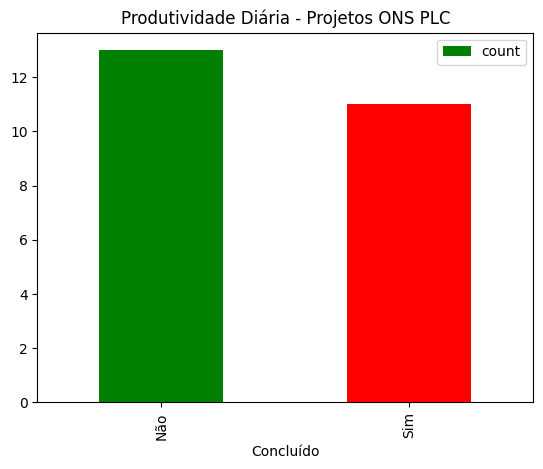

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Ler o arquivo
df = pd.read_excel(
    "/home/pedrov12/Documentos/GitHub/Tarefas_PLC_ONS_2026-02-14.xlsx"
)

"""
O que cada parte faz:

    by=['Data', 'Concluído']: Define a hierarquia da ordenação.
    ascending=[True, False]:
        True para a Data: organiza do dia mais antigo para o mais recente.
        False para Concluído: Como "Sim" vem depois de "Não" alfabeticamente, o False (ordem decrescente) força o "Sim" a aparecer primeiro caso haja empate na mesma data.
        
"""

df_ordenado = df.sort_values(by=['Data', 'Concluído'], ascending=[True, False])
print("Ultimas Tarefas concluídas da semana")
display(df_ordenado.head(7))

# Contar Status
status_counts = df["Concluído"].value_counts()

print(status_counts)

# Plotar
status_counts.plot(kind="bar", color=["green", "red"])
plt.title("Produtividade Diária - Projetos ONS PLC")
plt.legend()
plt.show()

In [34]:
dashboard_projetos_Qt6_file = "/home/pedrov12/Documentos/GitHub/Pikachu-Flask-Server/batcaverna/batcaverna-project/tools/dashboard_Qt6_MVC_v2.py"

import os

user_input = input("Deseja executar o programa de dashboard de tarefas?")

if user_input.upper() == "Q":
    print("Voce escolheu sair...")
else:
    os.system(f"python {dashboard_projetos_Qt6_file}")

Voce escolheu sair...
